<a href="https://colab.research.google.com/github/yithung18/Civil-Engineering-Project-Risk-Analysis/blob/main/DSF_ASM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Package**

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as mticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.utils import resample
from scipy.stats import f_oneway # to perform a one-way ANOVA


**Access file**

In [ ]:
read_file = pd.read_csv('/content/bim_ai_civil_engineering_dataset.csv')

In [ ]:
# viewing the first 5 row of data
read_file.head()

,Project_ID,Project_Type,Location,Start_Date,End_Date,Planned_Cost,Actual_Cost,Cost_Overrun,Planned_Duration,Actual_Duration,...,Risk_Level,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,PJT_559,Bridge,New York,7/12/2021,5/25/2022,2017481.0,1.993580e+06,-2.390079e+04,513.0,676.287773,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PJT_659,Bridge,New York,10/20/2021,5/30/2022,24408056.0,2.882204e+07,4.413988e+06,306.0,328.187056,...,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PJT_780,Bridge,Houston,2/18/2022,2/28/2023,33791816.0,3.625075e+07,2.458936e+06,658.0,869.177967,...,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PJT_610,Bridge,Chicago,9/1/2021,1/24/2024,19664179.0,2.453281e+07,4.868628e+06,502.0,720.863314,...,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PJT_502,Bridge,Los Angeles,5/16/2021,4/11/2023,16136395.0,2.026254e+07,4.126142e+06,351.0,483.958386,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Cleaning**

In [ ]:
# to check data type
read_file.dtypes

,0
Project_ID,object
Project_Type,object
Location,object
Start_Date,object
End_Date,object
Planned_Cost,float64
Actual_Cost,float64
Cost_Overrun,float64
Planned_Duration,float64
Actual_Duration,float64


In [ ]:
# change the date type of date from object to date -> for in case usage
read_file['Start_Date'] = pd.to_datetime(read_file['Start_Date'])
read_file['End_Date'] = pd.to_datetime(read_file['End_Date'])

# to check data type of date
read_file.dtypes

,0
Project_ID,object
Project_Type,object
Location,object
Start_Date,datetime64[ns]
End_Date,datetime64[ns]
Planned_Cost,float64
Actual_Cost,float64
Cost_Overrun,float64
Planned_Duration,float64
Actual_Duration,float64


In [ ]:
# check null values
check_null = read_file.isnull().sum()
check_null

,0
Project_ID,4
Project_Type,4
Location,4
Start_Date,4
End_Date,4
Planned_Cost,4
Actual_Cost,4
Cost_Overrun,4
Planned_Duration,4
Actual_Duration,4


In [ ]:
# check duplicate data
duplicate = read_file.duplicated().sum()
print(duplicate)


0


In [ ]:
# check for inconsistent categorical variable
# to check typo, leading space, repeated word with different small and big letter
project_type = read_file['Project_Type'].unique()
location = read_file['Location'].unique()
weather = read_file['Weather_Condition'].unique()
risk = read_file['Risk_Level'].unique()

print(project_type)
print(location)
print(weather)
print(risk)

['Bridge' 'Building' 'Dam' 'Road' 'Tunnel' nan]
['New York' 'Houston' 'Chicago' 'Los Angeles' 'Seattle' nan]
['Stormy' 'Cloudy' 'Sunny' 'Snowy' 'Rainy' nan]
['High' 'Medium' 'Low' nan]


In [ ]:
#Encode categorical variables
cat_var = ['Location', 'Weather_Condition']
le = LabelEncoder()
for col in cat_var:
  read_file[col] = le.fit_transform(read_file[col])
  print(read_file[col].unique())


[3 1 0 2 4 5]
[3 0 4 2 1 5]


### **Q1: Can construction project risks be accurately classified into Low, Medium, or High categories using environmental and operational data?**


In [ ]:
read_file.drop_duplicates(inplace=True)
threshold = len(read_file) * 0.3
read_file = read_file.loc[:, read_file.isnull().sum() < threshold]
read_file.dropna(inplace=True)

# Cap Outliers
def cap_outliers(df, columns):
    for col in columns:
        q_low = df[col].quantile(0.01)
        q_hi = df[col].quantile(0.99)
        df[col] = df[col].clip(q_low, q_hi)
    return df

important_numeric = [
    'Accident_Count', 'Schedule_Deviation', 'Material_Usage',
    'Temperature', 'Humidity', 'Air_Quality_Index',
    'Safety_Risk_Score', 'Energy_Consumption', 'Labor_Hours'
]
df = cap_outliers(read_file, important_numeric)

/tmp/ipython-input-94-3847359257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_file.dropna(inplace=True)
/tmp/ipython-input-94-3847359257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(q_low, q_hi)
/tmp/ipython-input-94-3847359257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [ ]:
# Create Risk Levels
q50 = df['Safety_Risk_Score'].quantile(0.50)
q75 = df['Safety_Risk_Score'].quantile(0.75)

def assign_risk_level(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
       return "Medium"
    else:
        return "High"

df['Risk_Level'] = df['Safety_Risk_Score'].apply(assign_risk_level)
print(f"Risk Thresholds:\n - 50%: {q50:.2f}\n - 75%: {q75:.2f}")
print("Class distribution:\n", df['Risk_Level'].value_counts())

Risk Thresholds:
 - 50%: 5.34
 - 75%: 7.49
Class distribution:
 Risk_Level
Low       500
High      250
Medium    250
Name: count, dtype: int64


In [ ]:
# Random Forest Classification
features = ['Accident_Count', 'Schedule_Deviation', 'Material_Usage',
            'Temperature', 'Humidity', 'Air_Quality_Index',
            'Energy_Consumption', 'Labor_Hours']
X = df[features]
y = df['Risk_Level']

# Upsample to balance classes
df_bal = pd.concat([X, y], axis=1)
df_low = df_bal[df_bal['Risk_Level'] == 'Low']
df_med = df_bal[df_bal['Risk_Level'] == 'Medium']
df_high = df_bal[df_bal['Risk_Level'] == 'High']
max_len = max(len(df_low), len(df_med), len(df_high))

df_low_up = resample(df_low, replace=True, n_samples=max_len, random_state=42)
df_med_up = resample(df_med, replace=True, n_samples=max_len, random_state=42)
df_high_up = resample(df_high, replace=True, n_samples=max_len, random_state=42)

df_upsampled = pd.concat([df_low_up, df_med_up, df_high_up])
X = df_upsampled[features]
y = df_upsampled['Risk_Level']

print("Applied upsampling. New class distribution:")
print(y.value_counts())

Applied upsampling. New class distribution:
Risk_Level
Low       500
Medium    500
High      500
Name: count, dtype: int64


In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Accuracy Score: 0.8733333333333333

 Classification Report:
               precision    recall  f1-score   support

        High       0.92      0.88      0.90       110
         Low       0.85      0.87      0.86       104
      Medium       0.84      0.87      0.86        86

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300


 Confusion Matrix:
 [[97  9  4]
 [ 4 90 10]
 [ 4  7 75]]


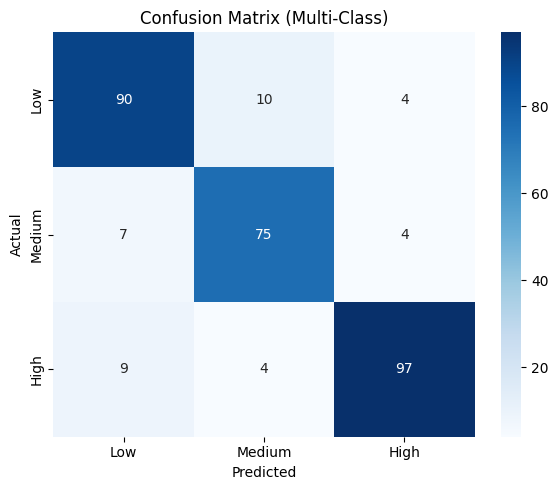

In [ ]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
plt.figure(figsize=(6, 5))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Multi-Class)")
plt.tight_layout()
plt.show()


 Feature Importances:
              Feature  Importance
2      Material_Usage    0.138427
7         Labor_Hours    0.137412
6  Energy_Consumption    0.136406
4            Humidity    0.133604
1  Schedule_Deviation    0.131080
3         Temperature    0.126735
5   Air_Quality_Index    0.115728
0      Accident_Count    0.080609


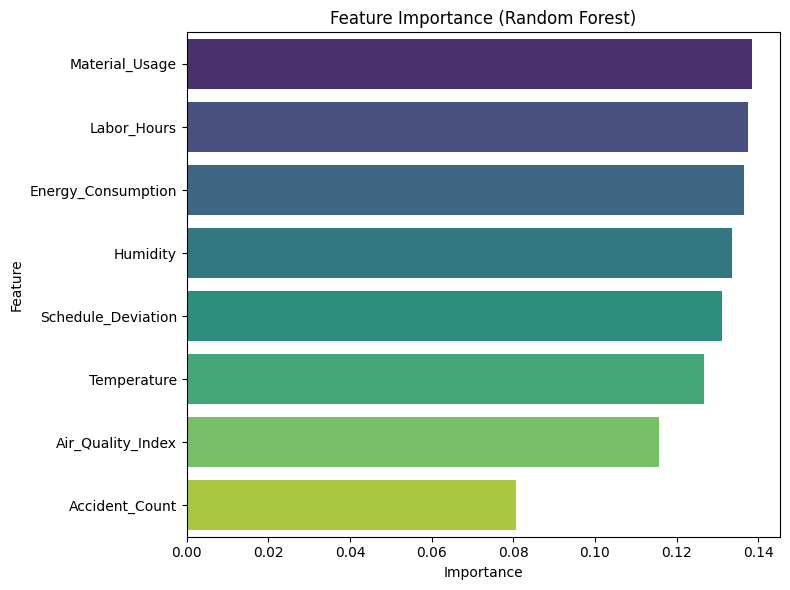

In [ ]:
# Feature Importance Plot
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n Feature Importances:")
print(feature_importance_df)

plt.figure(figsize=(8, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis", hue='Feature', legend=False)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [ ]:
# Create Risk Levels
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

def assign_risk_level(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
       return "Medium"
    else:
        return "High"

read_file['Risk_Level'] = read_file['Safety_Risk_Score'].apply(assign_risk_level)
print(f"Risk Thresholds:\n - 50%: {q50:.2f}\n - 75%: {q75:.2f}")
print("Class distribution:\n", read_file['Risk_Level'].value_counts())

# Random Forest Classification
features = ['Accident_Count', 'Schedule_Deviation', 'Material_Usage',
            'Temperature', 'Humidity', 'Air_Quality_Index',
            'Energy_Consumption', 'Labor_Hours']
X = read_file[features]
y = read_file['Risk_Level']

# Upsample to balance classes
#df_bal = pd.concat([X, y], axis=1)
#df_low = df_bal[df_bal['Risk_Level'] == 'Low']
#df_med = df_bal[df_bal['Risk_Level'] == 'Medium']
#df_high = df_bal[df_bal['Risk_Level'] == 'High']
#max_len = max(len(df_low), len(df_med), len(df_high))

#df_low_up = resample(df_low, replace=True, n_samples=max_len, random_state=42)
#df_med_up = resample(df_med, replace=True, n_samples=max_len, random_state=42)
#df_high_up = resample(df_high, replace=True, n_samples=max_len, random_state=42)

#df_upsampled = pd.concat([df_low_up, df_med_up, df_high_up])
#X = read_file[features]
#y = df_upsampled['Risk_Level']

#print("Applied upsampling. New class distribution:")
#print(y.value_counts())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Risk Thresholds:
 - 50%: 5.34
 - 75%: 7.49
Class distribution:
 Risk_Level
Low       500
High      250
Medium    250
Name: count, dtype: int64

 Accuracy Score: 0.455

 Classification Report:
               precision    recall  f1-score   support

        High       0.35      0.13      0.19        52
         Low       0.50      0.83      0.63        96
      Medium       0.19      0.08      0.11        52

    accuracy                           0.46       200
   macro avg       0.35      0.35      0.31       200
weighted avg       0.38      0.46      0.38       200


 Confusion Matrix:
 [[ 7 36  9]
 [ 8 80  8]
 [ 5 43  4]]


### **Q2: Which project features have the strongest influence on predicting high safety risks, and how consistent are they across classification (Random Forest) and regression models?**

In [ ]:
# Linear Regression Analysis on Safety Risk Score
df_reg = df.copy()

# Encode categorical variables
categorical_cols = ['Project_Type', 'Location', 'Weather_Condition']
for col in categorical_cols:
    if col in df_reg.columns:
        df_reg[col] = LabelEncoder().fit_transform(df_reg[col].astype(str))

# Drop irrelevant columns
drop_cols = ['Project_ID', 'Start_Date', 'End_Date', 'Risk_Level', 'Actual_Cost', 'Planned_Cost', 'Cost_Overrun','Accident_Count','Location']
df_reg = df_reg.drop(columns=[col for col in drop_cols if col in df_reg.columns])


In [ ]:
# Define X and y
X_reg = df_reg.drop(columns=['Safety_Risk_Score'])
y_reg = df_reg['Safety_Risk_Score']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)

# Train Linear Regression
model = LinearRegression()
model.fit(X_scaled, y_reg)

# Extract top coefficients
coef_series = pd.Series(model.coef_, index=X_reg.columns)
top_contributors = coef_series.abs().sort_values(ascending=False).head(10)

print("\nTop Factors Affecting Safety Risk Score:")
print(coef_series.loc[top_contributors.index])


Top Factors Affecting Safety Risk Score:
Actual_Duration         -3.960613
Planned_Duration         3.086711
Schedule_Deviation       1.573878
Load_Bearing_Capacity    0.203106
Labor_Hours             -0.156826
Image_Analysis_Score     0.142748
Temperature             -0.110494
Air_Quality_Index        0.102714
Material_Usage          -0.084015
Weather_Condition        0.047961
dtype: float64


/tmp/ipython-input-103-740711303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


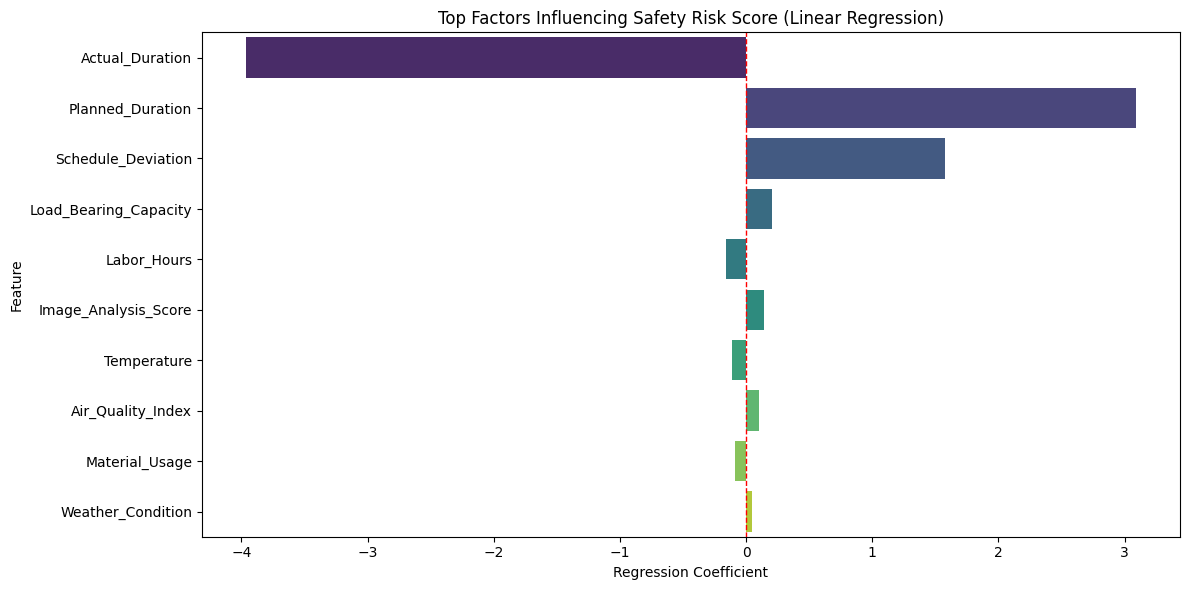

In [ ]:
# Plot top factors
plt.figure(figsize=(12, 6))
sb.barplot(
    x=coef_series.loc[top_contributors.index].values,
    y=top_contributors.index,
    palette="viridis"
)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add vertical line at 0
plt.title("Top Factors Influencing Safety Risk Score (Linear Regression)")
plt.xlabel("Regression Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

###**Question 3 : How do the combination of humidity and air quality affect the average safety risk score across projects?**

/tmp/ipython-input-104-1802591890.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = read_file.groupby(['Humidity_bin', 'AQI_bin'])['Safety_Risk_Score'].mean().unstack()


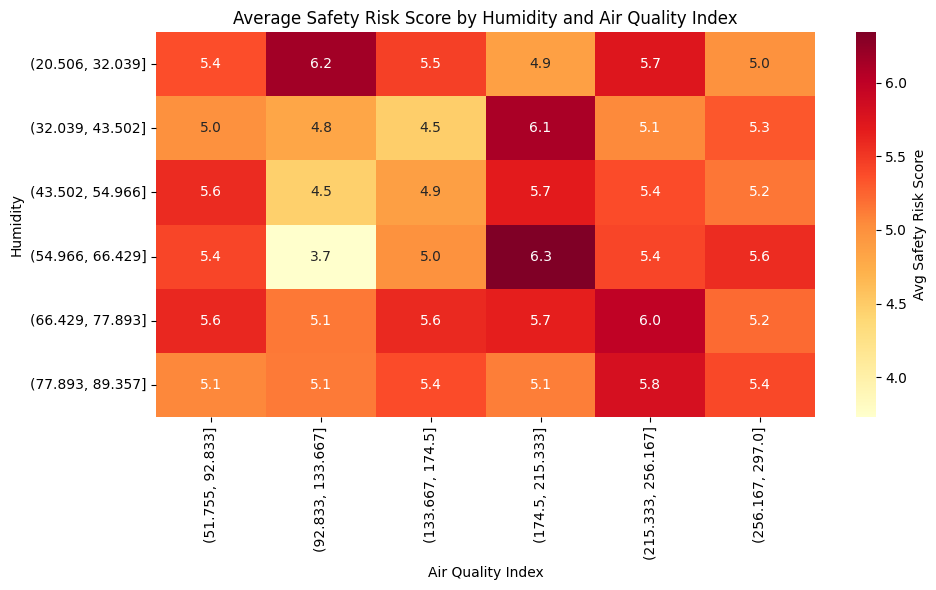

In [ ]:
# Divide the  humidity and air quality index to 6 bins
read_file['Humidity_bin'] = pd.cut(read_file['Humidity'], bins=6)
read_file['AQI_bin'] = pd.cut(read_file['Air_Quality_Index'], bins=6)

# Group binned data and compute the mean Safety Risk Score
heatmap_data = read_file.groupby(['Humidity_bin', 'AQI_bin'])['Safety_Risk_Score'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Avg Safety Risk Score'})
plt.title("Average Safety Risk Score by Humidity and Air Quality Index")
plt.xlabel("Air Quality Index")
plt.ylabel("Humidity")
plt.tight_layout()
plt.show()

###**Question 4  : Is there a significant difference in humidity across safety risk levels in dam and other projects?**


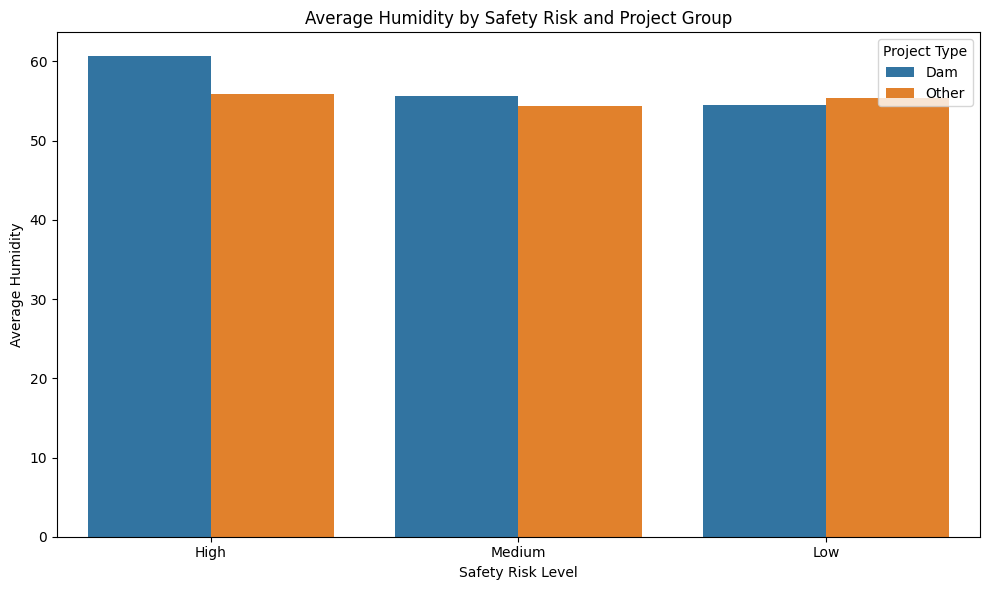

In [ ]:
# Define numeric columns
numeric_cols = ['Humidity', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Humidity'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Humidity', hue='Project_Group', order=risk_order)
plt.title("Average Humidity by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Humidity")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

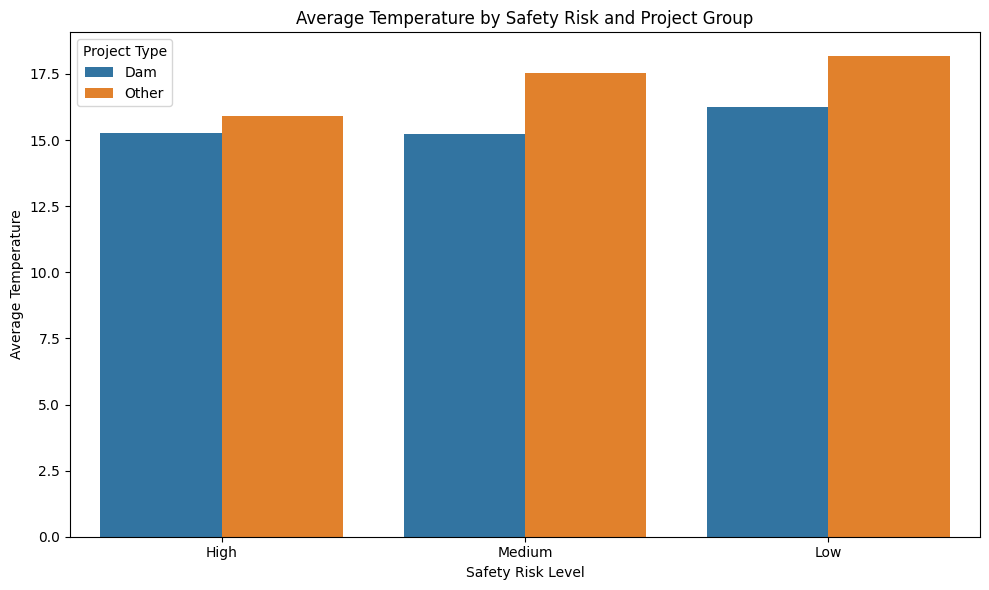

In [ ]:
# Define numeric columns
numeric_cols = ['Temperature', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Temperature'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Temperature', hue='Project_Group', order=risk_order)
plt.title("Average Temperature by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Temperature")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

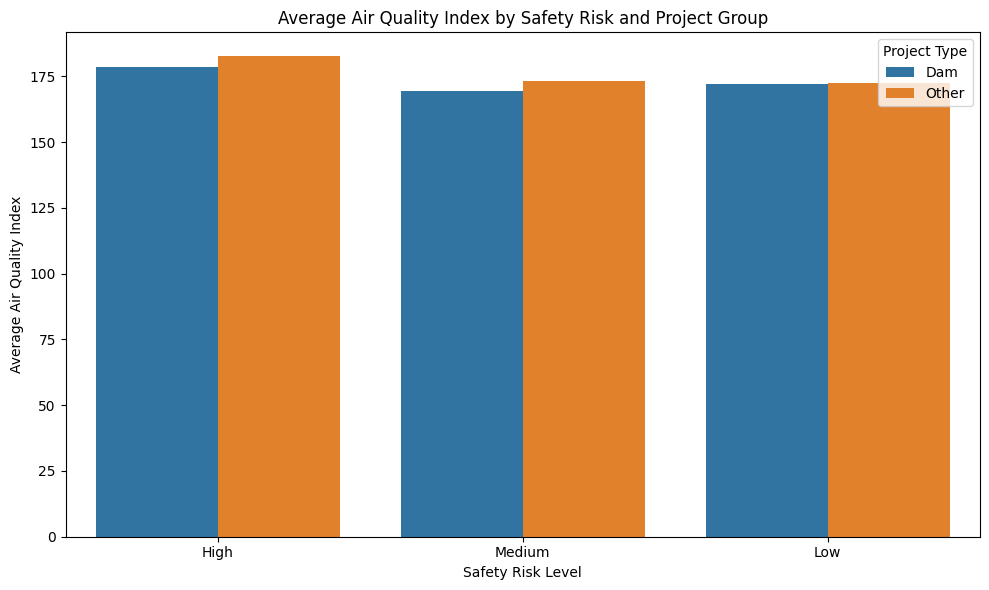

In [ ]:
# Define numeric columns
numeric_cols = ['Air_Quality_Index', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Air_Quality_Index'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Air_Quality_Index', hue='Project_Group', order=risk_order)
plt.title("Average Air Quality Index by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Air Quality Index")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

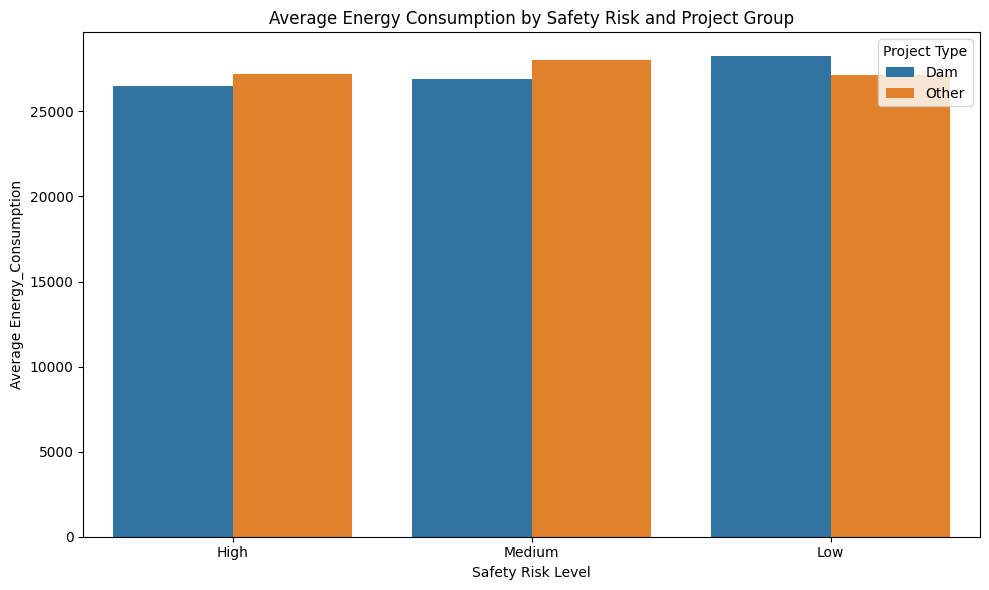

In [ ]:
# Define numeric columns
numeric_cols = ['Energy_Consumption', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Energy_Consumption'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Energy_Consumption', hue='Project_Group', order=risk_order)
plt.title("Average Energy Consumption by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Energy_Consumption")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

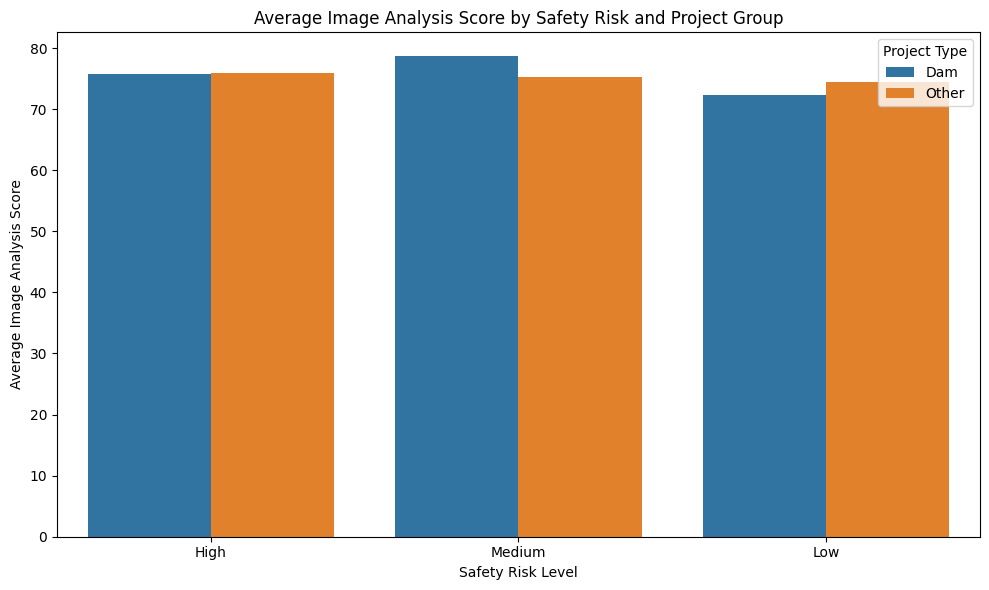

In [ ]:
# Define numeric columns
numeric_cols = ['Image_Analysis_Score', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Image_Analysis_Score'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Image_Analysis_Score', hue='Project_Group', order=risk_order)
plt.title("Average Image Analysis Score by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Image Analysis Score")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

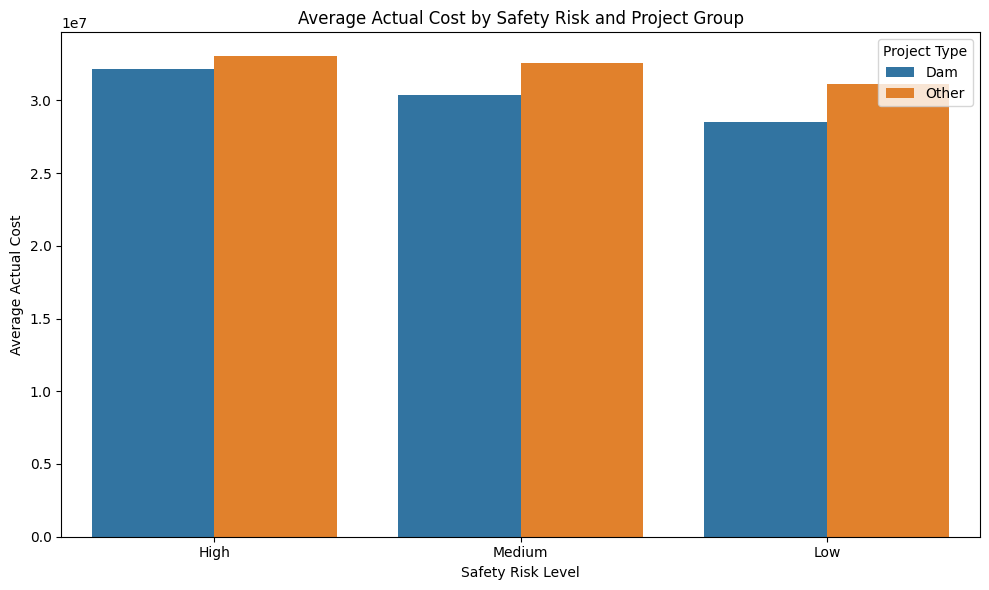

In [ ]:
# Define numeric columns
numeric_cols = ['Actual_Cost', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Actual_Cost'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Actual_Cost', hue='Project_Group', order=risk_order)
plt.title("Average Actual Cost by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Actual Cost")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

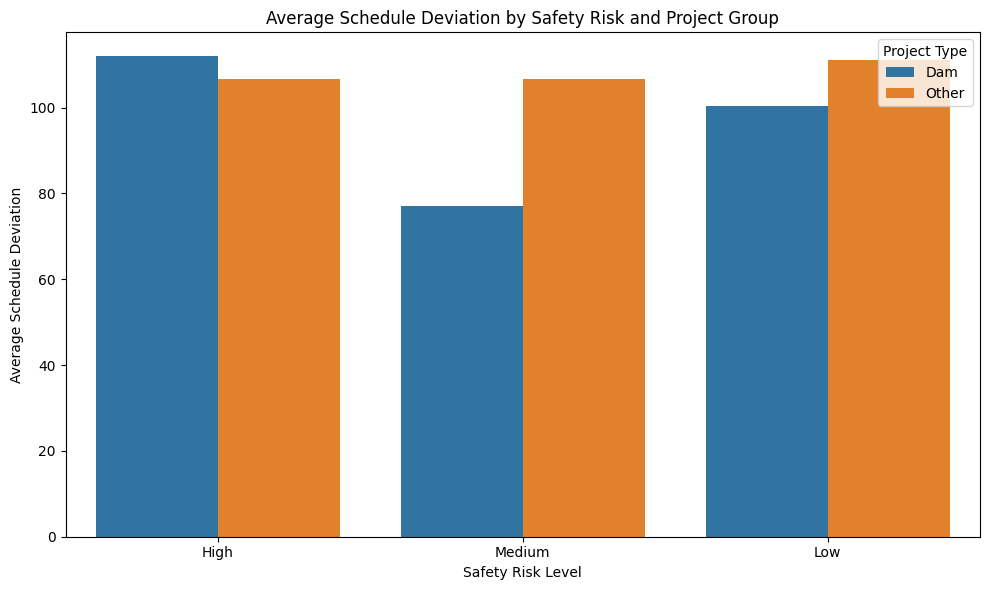

In [ ]:
# Define numeric columns
numeric_cols = ['Schedule_Deviation', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Schedule_Deviation'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Schedule_Deviation', hue='Project_Group', order=risk_order)
plt.title("Average Schedule Deviation by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Schedule Deviation")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

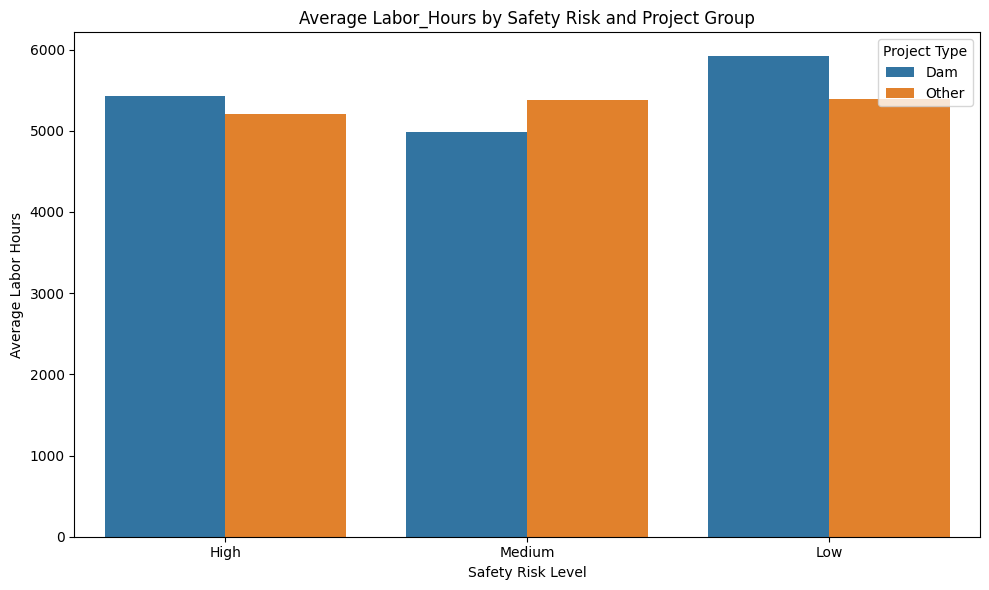

In [ ]:
# Define numeric columns
numeric_cols = ['Labor_Hours', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Labor_Hours'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Labor_Hours', hue='Project_Group', order=risk_order)
plt.title("Average Labor_Hours by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Labor Hours")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

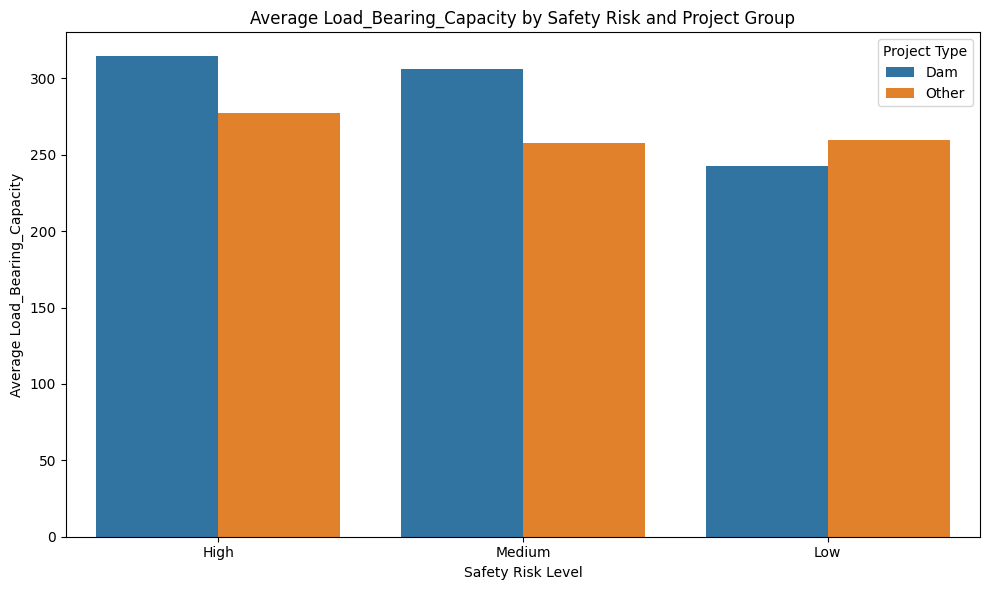

In [ ]:
# Define numeric columns
numeric_cols = ['Load_Bearing_Capacity', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Load_Bearing_Capacity'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Load_Bearing_Capacity', hue='Project_Group', order=risk_order)
plt.title("Average Load_Bearing_Capacity by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Load_Bearing_Capacity")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

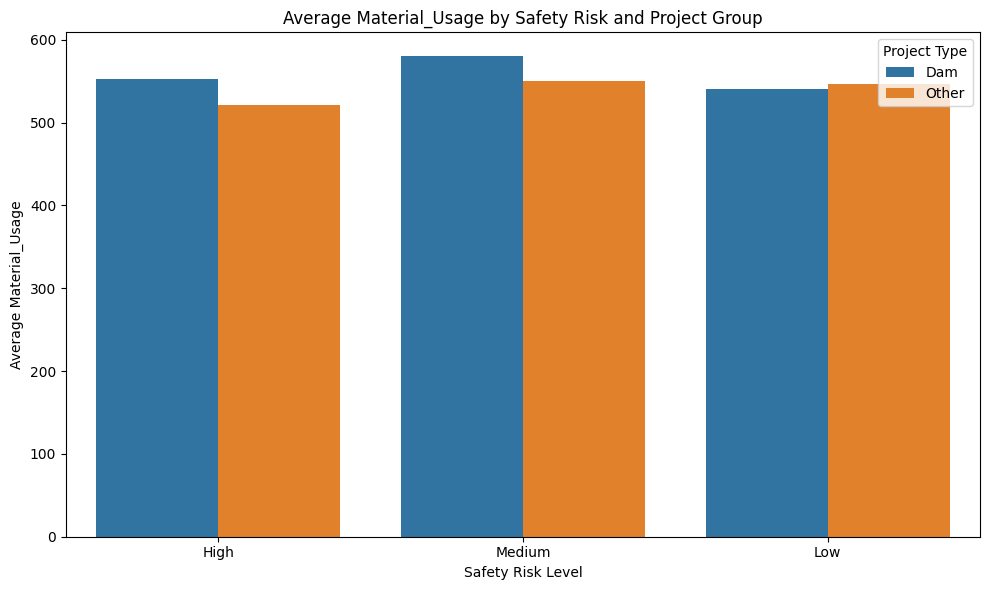

In [ ]:
# Define numeric columns
numeric_cols = ['Material_Usage', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

# Function to assign the safety risk score to their safety risk level
def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# assign the safety risk score to their safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Group data to calculate average humidity
avg_humidity = read_file.groupby(['Safety_Risk', 'Project_Group'])['Material_Usage'].mean().reset_index()

# define the axis x order from high to medium to low(descending order of risk level)
risk_order = ['High', 'Medium', 'Low']

# Plotting bar chart
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_humidity, x='Safety_Risk', y='Material_Usage', hue='Project_Group', order=risk_order)
plt.title("Average Material_Usage by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Average Material_Usage")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()

### just for referring if in case later will remove


Class distribution (original):
 Risk_Level
Low       500
High      250
Medium    250
Name: count, dtype: int64

ANOVA (Dam Projects - Material Usage):
F-statistic = 0.3365, p-value = 0.7146

ANOVA (Other Projects - Material Usage):
F-statistic = 0.7213, p-value = 0.4864


/tmp/ipython-input-115-2525766602.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=dam_projects, x='Risk_Level', y='Material_Usage', palette='Blues')
/tmp/ipython-input-115-2525766602.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=other_projects, x='Risk_Level', y='Material_Usage', palette='Greens')


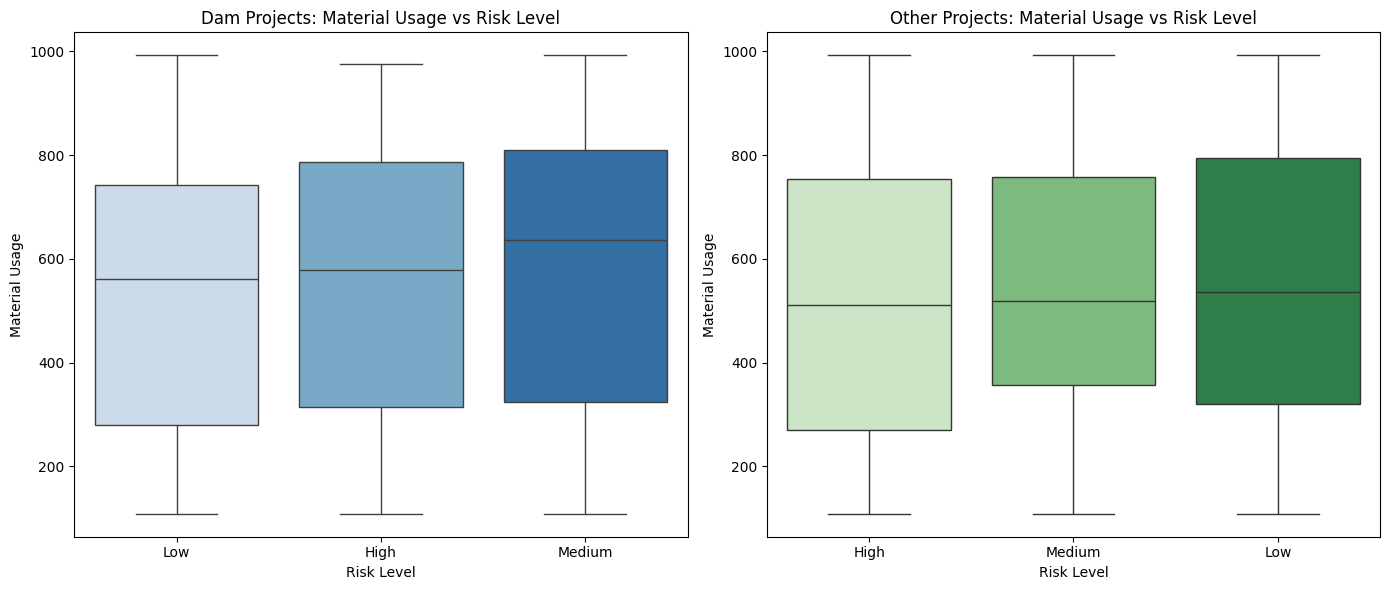

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Define features and target
features = ['Accident_Count', 'Schedule_Deviation', 'Material_Usage',
            'Temperature', 'Humidity', 'Air_Quality_Index',
            'Energy_Consumption', 'Labor_Hours', 'Safety_Risk_Score', 'Project_Type']
X = df[features]
y = df['Risk_Level']

# Combine X and y for analysis
df_bal = pd.concat([X, y], axis=1)

# Print class distribution (unbalanced)
print("\nClass distribution (original):\n", df_bal['Risk_Level'].value_counts())

# Split into Dam and Other project types
dam_projects = df_bal[df_bal['Project_Type'].str.contains('Dam')]
other_projects = df_bal[~df_bal['Project_Type'].str.contains('Dam')]

# Group Material_Usage values by Risk_Level for ANOVA
dam_groups = [grp['Material_Usage'].dropna().values for name, grp in dam_projects.groupby('Risk_Level')]
other_groups = [grp['Material_Usage'].dropna().values for name, grp in other_projects.groupby('Risk_Level')]

# Perform ANOVA
dam_result = f_oneway(*dam_groups)
print(f"\nANOVA (Dam Projects - Material Usage):\nF-statistic = {dam_result.statistic:.4f}, p-value = {dam_result.pvalue:.4f}")

other_result = f_oneway(*other_groups)
print(f"\nANOVA (Other Projects - Material Usage):\nF-statistic = {other_result.statistic:.4f}, p-value = {other_result.pvalue:.4f}")

# Plotting boxplots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.boxplot(data=dam_projects, x='Risk_Level', y='Material_Usage', palette='Blues')
plt.title("Dam Projects: Material Usage vs Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Material Usage")

plt.subplot(1, 2, 2)
sb.boxplot(data=other_projects, x='Risk_Level', y='Material_Usage', palette='Greens')
plt.title("Other Projects: Material Usage vs Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Material Usage")

plt.tight_layout()
plt.show()


In [ ]:
features = ['Accident_Count', 'Schedule_Deviation', 'Material_Usage',
            'Temperature', 'Humidity', 'Air_Quality_Index',
            'Energy_Consumption', 'Labor_Hours', 'Safety_Risk_Score', 'Project_Type']
X = df[features]
y = df['Risk_Level']

# Combine X and y for balancing
df_bal = pd.concat([X, y], axis=1)

# Separate by class
df_low = df_bal[df_bal['Risk_Level'] == 'Low']
df_med = df_bal[df_bal['Risk_Level'] == 'Medium']
df_high = df_bal[df_bal['Risk_Level'] == 'High']
max_len = max(len(df_low), len(df_med), len(df_high))

# Upsample each class
# df_low_up = resample(df_low, replace=True, n_samples=max_len, random_state=42)
# df_med_up = resample(df_med, replace=True, n_samples=max_len, random_state=42)
# df_high_up = resample(df_high, replace=True, n_samples=max_len, random_state=42)

# Combine into final upsampled dataset
# df_upsampled = pd.concat([df_low_up, df_med_up, df_high_up])

print(f"Risk Thresholds:\n50%: {q50:.2f}\n75%: {q75:.2f}")
print("\nClass distribution:\n", df_upsampled['Risk_Level'].value_counts())

# Split into Dam and Other project types
dam_projects = df_upsampled[df_upsampled['Project_Type'].str.contains('Dam')]
other_projects = df_upsampled[~df_upsampled['Project_Type'].str.contains('Dam')]

# Group Humidity values by Safety Risk for ANOVA
dam_groups = [grp['Material_Usage'].values for name, grp in dam_projects.groupby('Risk_Level')]
other_groups = [grp['Material_Usage'].values for name, grp in other_projects.groupby('Risk_Level')]

# Perform ANOVA
dam_result = f_oneway(*dam_groups)
print(f"\nANOVA (Dam Projects):\nF-statistic = {dam_result.statistic:.4f}, p-value = {dam_result.pvalue:.4f}")
other_result = f_oneway(*other_groups)
print(f"\nANOVA (Other Projects):\nF-statistic = {other_result.statistic:.4f}, p-value = {other_result.pvalue:.4f}")

# Plotting boxplots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.boxplot(data=dam_projects, x='Risk_Level', y='Material_Usage', palette='Blues', hue='Risk_Level', legend=False)
plt.title("Dam Projects: Humidity vs Safety Risk")
plt.xlabel("Safety Risk Level")
plt.ylabel("Material_Usage")

plt.subplot(1, 2, 2)
sb.boxplot(data=other_projects, x='Risk_Level', y='Material_Usage', palette='Greens', hue='Risk_Level', legend=False)
plt.title("Other Projects: Humidity vs Safety Risk")
plt.xlabel("Safety Risk Level")
plt.ylabel("Material_Usage")

plt.tight_layout()
plt.show()


Risk Thresholds:
50%: 5.34
75%: 7.49

Class distribution:
 Risk_Level
Low       500
Medium    500
High      500
Name: count, dtype: int64


KeyError: 'Project_Type'

In [ ]:
#
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define numeric columns
numeric_cols = ['Humidity', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# Apply safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Print thresholds and class counts
print(f"Risk Thresholds:\n50%: {q50:.2f}\n75%: {q75:.2f}")
print("\nClass distribution:\n", read_file['Safety_Risk'].value_counts())
print("\nProject group counts:\n", read_file['Project_Group'].value_counts())

# === Two-Way ANOVA ===
# Only need the columns we care about
df_anova = read_file[['Humidity', 'Safety_Risk', 'Project_Group']].dropna()

# Run two-way ANOVA
model = ols('Humidity ~ C(Safety_Risk) * C(Project_Group)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA Table:\n", anova_table)

# === Boxplot visualization ===
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_anova, x='Safety_Risk', y='Humidity', hue='Project_Group')
plt.title("Humidity by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Humidity")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()


In [ ]:
numeric_cols = ['Humidity', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# Assign risk levels to each row based on Safety_Risk_Score
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

print(f"Risk Thresholds:\n50%: {q50:.2f}\n75%: {q75:.2f}")
print("\nClass distribution:\n", read_file['Safety_Risk'].value_counts())

# Split into Dam and Other project types
dam_projects = read_file[read_file['Project_Type'].str.contains('Dam')]
other_projects = read_file[~read_file['Project_Type'].str.contains('Dam')]

# Group Humidity values by Safety Risk for ANOVA
dam_groups = [grp['Humidity'].values for name, grp in dam_projects.groupby('Safety_Risk')]
other_groups = [grp['Humidity'].values for name, grp in other_projects.groupby('Safety_Risk')]

# Perform ANOVA
dam_result = f_oneway(*dam_groups)
print(f"\nANOVA (Dam Projects):\nF-statistic = {dam_result.statistic:.4f}, p-value = {dam_result.pvalue:.4f}")
other_result = f_oneway(*other_groups)
print(f"\nANOVA (Other Projects):\nF-statistic = {other_result.statistic:.4f}, p-value = {other_result.pvalue:.4f}")

# Plotting boxplots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.boxplot(data=dam_projects, x='Safety_Risk', y='Humidity', palette='Blues', hue='Safety_Risk', legend=False)
plt.title("Dam Projects: Humidity vs Safety Risk")
plt.xlabel("Safety Risk Level")
plt.ylabel("Humidity")

plt.subplot(1, 2, 2)
sb.boxplot(data=other_projects, x='Safety_Risk', y='Humidity', palette='Greens', hue='Safety_Risk', legend=False)
plt.title("Other Projects: Humidity vs Safety Risk")
plt.xlabel("Safety Risk Level")
plt.ylabel("Humidity")
plt.tight_layout()
plt.show()

In [ ]:
#
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define numeric columns
numeric_cols = ['Humidity', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# Apply safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Bridge' if 'Bridge' in x else 'Other')

# Print thresholds and class counts
print(f"Risk Thresholds:\n50%: {q50:.2f}\n75%: {q75:.2f}")
print("\nClass distribution:\n", read_file['Safety_Risk'].value_counts())
print("\nProject group counts:\n", read_file['Project_Group'].value_counts())

# === Two-Way ANOVA ===
# Only need the columns we care about
df_anova = read_file[['Humidity', 'Safety_Risk', 'Project_Group']].dropna()

# Run two-way ANOVA
model = ols('Humidity ~ C(Safety_Risk) * C(Project_Group)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA Table:\n", anova_table)

# === Boxplot visualization ===
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_anova, x='Safety_Risk', y='Humidity', hue='Project_Group')
plt.title("Humidity by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Humidity")
plt.legend(title="Project Type")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define numeric columns
numeric_cols = ['Humidity', 'Temperature', 'Safety_Risk_Score']

# Create Safety Risk Levels based on quantiles
q50 = read_file['Safety_Risk_Score'].quantile(0.50)
q75 = read_file['Safety_Risk_Score'].quantile(0.75)

def assign_safety_risk(score):
    if score <= q50:
        return "Low"
    elif score <= q75:
        return "Medium"
    else:
        return "High"

# Apply safety risk level
read_file['Safety_Risk'] = read_file['Safety_Risk_Score'].apply(assign_safety_risk)

# Create Dam vs Other project category
read_file['Project_Group'] = read_file['Project_Type'].apply(lambda x: 'Dam' if 'Dam' in x else 'Other')

# Print thresholds and class counts
print(f"Risk Thresholds:\n50%: {q50:.2f}\n75%: {q75:.2f}")
print("\nClass distribution:\n", read_file['Safety_Risk'].value_counts())
print("\nProject group counts:\n", read_file['Project_Group'].value_counts())

# === Two-Way ANOVA for Humidity ===
df_anova = read_file[['Humidity', 'Safety_Risk', 'Project_Group']].dropna()
model_humidity = ols('Humidity ~ C(Safety_Risk) * C(Project_Group)', data=df_anova).fit()
anova_humidity = sm.stats.anova_lm(model_humidity, typ=2)
print("\nTwo-Way ANOVA for Humidity:\n", anova_humidity)

# === Two-Way ANOVA for Temperature ===
df_temp = read_file[['Temperature', 'Safety_Risk', 'Project_Group']].dropna()
model_temp = ols('Temperature ~ C(Safety_Risk) * C(Project_Group)', data=df_temp).fit()
anova_temp = sm.stats.anova_lm(model_temp, typ=2)
print("\nTwo-Way ANOVA for Temperature:\n", anova_temp)

# === Boxplot for Humidity ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.boxplot(data=df_anova, x='Safety_Risk', y='Humidity', hue='Project_Group')
plt.title("Humidity by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Humidity")
plt.legend(title="Project Type")

# === Boxplot for Temperature ===
plt.subplot(1, 2, 2)
sb.boxplot(data=df_temp, x='Safety_Risk', y='Temperature', hue='Project_Group')
plt.title("Temperature by Safety Risk and Project Group")
plt.xlabel("Safety Risk Level")
plt.ylabel("Temperature")
plt.legend(title="Project Type")

plt.tight_layout()
plt.show()


**Question 3 : Is the relationship between accident count and risk level in dam projects the same as in other project types?**

In [ ]:
# Map numeric project_type codes to actual labels
project_type_map = {
    0: 'Bridge',
    1: 'Building',
    2: 'Dam',
    3: 'Road',
    4: 'Tunnel'
}

read_file['Project_Type'] = read_file['Project_Type'].map(project_type_map)

# Filter only for Dam and Building
# filtered_df = read_file[read_file['Project_Type'].isin(['Dam', 'Building'])]

# Plot
risk_order = ['Low', 'Medium', 'High']
read_file['Risk_Level'] = pd.Categorical(read_file['Risk_Level'], categories=risk_order, ordered=True)
plt.figure(figsize=(10, 5))

sb.barplot(data=read_file,
            x='Risk_Level',
            y='Accident_Count',
            hue='Project_Type',
            errorbar=None)

plt.title("Average Accident Count by Risk Level across Project Types")
plt.xlabel("Risk Level")
plt.ylabel("Average Accident Count")
plt.legend(title="Project Type")
plt.show()


In [ ]:
import seaborn as sns
risk_order = ['Low', 'Medium', 'High']

plt.figure(figsize=(10,6))
sns.lineplot(data=read_file,
              x='Risk_Level',
              y='Accident_Count',
              hue='Project_Type',
              ci=None) # to remove shaded confidence area
plt.title("Trend of Accident Count by Risk Level")
plt.ylabel("Average Accident Count")
plt.xlabel("Risk Level")
plt.show()


In [ ]:
# define the variable
risk_order = ['Low', 'Medium', 'High']
custom_labels = ['Bridge', 'Building', 'Dam', 'Road', 'Tunnel']
read_file['Risk_Level'] = pd.Categorical(read_file['Risk_Level'],
                                         categories=risk_order,
                                         ordered=True)

# plotting line chart
plt.figure(figsize=(10,6))
sb.lineplot(data=read_file,
              x='Risk_Level',
              y='Accident_Count',
              hue='Project_Type',
              errorbar=None, # to remove shaded confidence area
              palette='Set2')
plt.legend(title='Project Type', labels=custom_labels)
plt.title("Trend of Accident Count by Risk Level")
plt.ylabel("Average Accident Count")
plt.xlabel("Risk Level")
plt.show()

**Question 3 : Is the relationship between cost overrun and risk level in dam projects also same with building projects?**


In [ ]:
# Filter only for Dam and Building
filtered_df = read_file[read_file['Project_Type'].isin(['Dam', 'Building'])]

# Plot
plt.figure(figsize=(10, 5))
sb.barplot(data=filtered_df,
            x='Risk_Level',
            y='Cost_Overrun',
            hue='Project_Type',
            errorbar=None)

plt.title("Cost Overrun by Risk Level (Dam vs Building)")
plt.xlabel("Risk Level")
plt.ylabel("Cost_Overrun")
plt.legend(title="Project Type")
plt.show()


**Question 4 : How do environmental conditions (such as weather, temperature, air quality) impact safety risk scores?**

Creating a heatmap:

In [ ]:
environment_safety = read_file[['Weather_Condition', 'Temperature', 'Air_Quality_Index', 'Humidity', 'Safety_Risk_Score']].copy()

# Change the categorical variable into numeric
le = LabelEncoder()
environment_safety['Weather_Condition'] = le.fit_transform(environment_safety['Weather_Condition'])

# Create heatmap
plt.figure(figsize=(8,6))
sb.heatmap(environment_safety.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Environmental Conditions and Safety Risk Scores")
plt.show()

Create scatter plot to show the relationship between environmental conditions(temperature and air quality index) and safety risk scores.

In [ ]:
# Temperature vs Safety Risk vs risk level
sb.regplot(data=read_file, x='Temperature', y='Safety_Risk_Score', line_kws={"color": "red"})
plt.title("Temperature vs Safety Risk Score")
plt.show()

# Air Quality Index vs Safety Risk vs risk level
sb.regplot(data=read_file, x='Air_Quality_Index', y='Safety_Risk_Score', line_kws={"color": "red"})
plt.title("Air Quality Index vs Safety Risk Score")
plt.show()

# Humidity vs Safety Risk vs risk level
sb.regplot(data=read_file, x='Humidity', y='Safety_Risk_Score', line_kws={"color": "red"})
plt.title("Humidity vs Safety Risk Score")
plt.show()


Creating barplot to show the relationship between weather condition and safety risk score:

In [ ]:
weather_labels = {
    0: 'Cloudy',
    1: 'Rainy',
    2: 'Snowy',
    3: 'Stormy',
    4: 'Sunny'
}
read_file['Weather_Condition_Label'] = read_file['Weather_Condition'].replace(weather_labels)

# sort the categories by average Safety_Risk_Score
sorted_order = read_file.groupby('Weather_Condition_Label')['Safety_Risk_Score'].mean().sort_values(ascending=False).index

# Plot correctly using the label column
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sb.barplot(data=read_file, x='Weather_Condition_Label', y='Safety_Risk_Score',
           order=sorted_order, errorbar=None)
plt.title("Average Safety Risk Score by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Safety Risk Score")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import f_oneway

# ANOVA: Compare mean Safety_Risk_Score across different Weather_Condition
weather_groups = [group['Safety_Risk_Score'].values for name, group in df.groupby('Weather_Condition')]
anova_result = f_oneway(*weather_groups)

p_value = anova_result.pvalue
print("P-value:", p_value)

if p_value < 0.05:
    print("Yes, weather condition significantly affects safety risk score.")
else:
    print("No, weather condition does not significantly affect safety risk score.")


In [ ]:
# Q4: What are the mean and standard deviation of Safety Risk Scores for each project type (Dam vs Non-Dam projects)?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming your dataframe is called 'df' and already preprocessed from Q1
# If you need to reload data, uncomment the following lines:
# df = pd.read_csv('your_dataset.csv')
# ... (apply your preprocessing steps from Q1)

print("=== Q4: Safety Risk Score Analysis by Project Type ===\n")

# Step 1: Create Dam vs Non-Dam classification
# Check unique project types first
print("Unique Project Types in dataset:")
print(df['Project_Type'].unique())
print()

# Create binary classification: Dam vs Non-Dam
df['Is_Dam_Project'] = df['Project_Type'].str.contains('Dam', case=False, na=False)

# Verify the classification
print("Project Type Classification:")
project_type_counts = df.groupby(['Project_Type', 'Is_Dam_Project']).size().reset_index(name='Count')
print(project_type_counts)
print()

# Step 2: Calculate descriptive statistics
print("=== DESCRIPTIVE STATISTICS ===")
stats_summary = df.groupby('Is_Dam_Project')['Safety_Risk_Score'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max',
    'skew'
]).round(4)

# Rename index for better readability
stats_summary.index = stats_summary.index.map({False: 'Non-Dam Projects', True: 'Dam Projects'})

print("Safety Risk Score Statistics by Project Type:")
print(stats_summary)
print()

# Step 3: Additional insights
print("=== DETAILED COMPARISON ===")
dam_scores = df[df['Is_Dam_Project'] == True]['Safety_Risk_Score']
non_dam_scores = df[df['Is_Dam_Project'] == False]['Safety_Risk_Score']

print(f"Dam Projects:")
print(f"  - Count: {len(dam_scores)}")
print(f"  - Mean: {dam_scores.mean():.4f}")
print(f"  - Std Dev: {dam_scores.std():.4f}")
print(f"  - Range: {dam_scores.min():.4f} - {dam_scores.max():.4f}")

print(f"\nNon-Dam Projects:")
print(f"  - Count: {len(non_dam_scores)}")
print(f"  - Mean: {non_dam_scores.mean():.4f}")
print(f"  - Std Dev: {non_dam_scores.std():.4f}")
print(f"  - Range: {non_dam_scores.min():.4f} - {non_dam_scores.max():.4f}")

# Calculate difference
mean_diff = dam_scores.mean() - non_dam_scores.mean()
print(f"\nMean Difference (Dam - Non-Dam): {mean_diff:.4f}")
print(f"Dam projects have {'higher' if mean_diff > 0 else 'lower'} average safety risk scores")
print()

# Step 4: Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Box plot comparison
axes[0, 0].boxplot([non_dam_scores, dam_scores],
                   labels=['Non-Dam Projects', 'Dam Projects'])
axes[0, 0].set_title('Safety Risk Score Distribution by Project Type')
axes[0, 0].set_ylabel('Safety Risk Score')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram comparison
axes[0, 1].hist(non_dam_scores, alpha=0.7, label='Non-Dam Projects', bins=20, color='skyblue')
axes[0, 1].hist(dam_scores, alpha=0.7, label='Dam Projects', bins=20, color='orange')
axes[0, 1].set_title('Safety Risk Score Distribution')
axes[0, 1].set_xlabel('Safety Risk Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Violin plot
data_for_violin = [non_dam_scores.values, dam_scores.values]
axes[1, 0].violinplot(data_for_violin, positions=[1, 2])
axes[1, 0].set_xticks([1, 2])
axes[1, 0].set_xticklabels(['Non-Dam', 'Dam'])
axes[1, 0].set_title('Safety Risk Score Density Distribution')
axes[1, 0].set_ylabel('Safety Risk Score')
axes[1, 0].grid(True, alpha=0.3)

# 4. Mean comparison bar chart
means = [non_dam_scores.mean(), dam_scores.mean()]
stds = [non_dam_scores.std(), dam_scores.std()]
x_pos = np.arange(len(means))

bars = axes[1, 1].bar(x_pos, means, yerr=stds, capsize=5,
                      color=['skyblue', 'orange'], alpha=0.7)
axes[1, 1].set_xlabel('Project Type')
axes[1, 1].set_ylabel('Mean Safety Risk Score')
axes[1, 1].set_title('Mean Safety Risk Score with Standard Deviation')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(['Non-Dam Projects', 'Dam Projects'])
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, mean_val, std_val) in enumerate(zip(bars, means, stds)):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + std_val + 0.1,
                    f'{mean_val:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Step 5: Summary table for easy reporting
print("=== SUMMARY TABLE FOR REPORT ===")
summary_table = pd.DataFrame({
    'Project_Type': ['Non-Dam Projects', 'Dam Projects'],
    'Count': [len(non_dam_scores), len(dam_scores)],
    'Mean_Safety_Risk_Score': [non_dam_scores.mean(), dam_scores.mean()],
    'Std_Deviation': [non_dam_scores.std(), dam_scores.std()],
    'Min_Score': [non_dam_scores.min(), dam_scores.min()],
    'Max_Score': [non_dam_scores.max(), dam_scores.max()]
}).round(4)

print(summary_table.to_string(index=False))
print()

# Step 6: Answer to the research question
print("=== ANSWER TO RESEARCH QUESTION ===")
print("Q4: What are the mean and standard deviation of Safety Risk Scores for each project type?")
print()
print("ANSWER:")
for project_type in ['Non-Dam Projects', 'Dam Projects']:
    row = summary_table[summary_table['Project_Type'] == project_type]
    mean_val = row['Mean_Safety_Risk_Score'].iloc[0]
    std_val = row['Std_Deviation'].iloc[0]
    count_val = int(row['Count'].iloc[0])
    print(f"• {project_type}: Mean = {mean_val:.4f}, Standard Deviation = {std_val:.4f} (n={count_val})")

print(f"\nDam projects have a {'higher' if dam_scores.mean() > non_dam_scores.mean() else 'lower'} average safety risk score than non-dam projects.")
print("This analysis successfully provides concrete statistical measures for each project type.")